(plotting_demo_complete)=
# [Complete]Plotting and bootstrap demo

**2025-02-13**

---

In [1]:
# imports we'll need
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 0. The normal distribution

A probability distribution that we will frequently encounter in addition to the categorical distributions we saw in worksheet 1 is the **normal distribution**. The normal distribution has the following properties:

- centered and symmetric about the **mean** $\mu$ (or $E[X]$)
- spread by the **standard deviation** $\sigma$
    - the **variance** is $\sigma^2$ (or $V[X]$)

We write a random variable as $X$ that follows a normal distribution as $X \sim \mathcal{N}(\mu, \sigma^2)$.

:::{tip}

Watch whether the software you are using takes the variance or the standard deviation as input. In `numpy`, it is the standard deviation, which is different than how we write the distribution above.

:::

We can draw random samples from the normal distribution using [`numpy.random.Generator.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html):

In [3]:
# This creates a generator with a fixed seed, so we can generate the same random numbers
rng = np.random.default_rng(seed=42)

# generate 50000 samples from a normal distribution with E[X]=10 and standard deviation 1
n_samples = 50000
goose_samples = rng.normal(loc=10, scale=1, size=n_samples)

<Axes: ylabel='Count'>

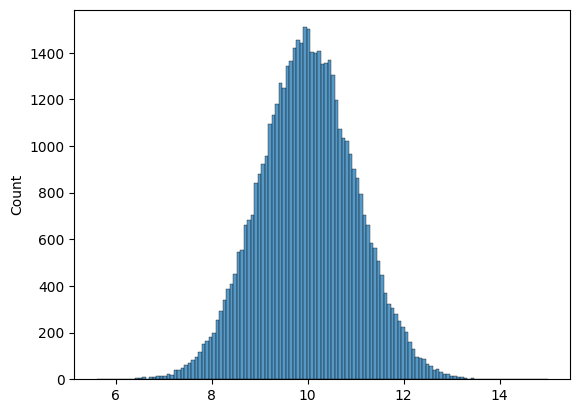

In [6]:
goose_samples.shape
sns.histplot(goose_samples);

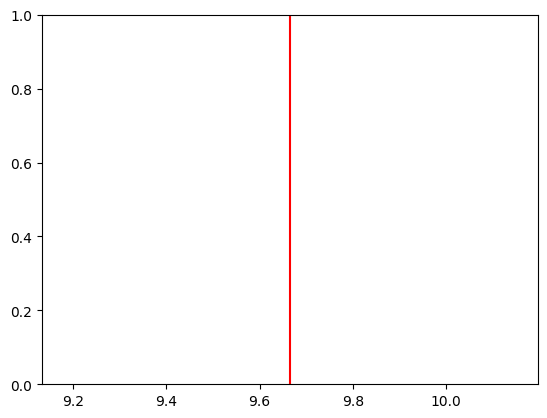

In [11]:
sample = goose_samples[:10]
goose_mean = np.mean(sample)

# in reality, we don't have access to the "true" distribution, which is why it's commented out
#sns.histplot(goose_samples)
plt.axvline(x=goose_mean, color='red');

For bootstrap samples, we can use [random.Generator.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html) with replacement to draw samples from our dataset.

(8.0, 12.0)

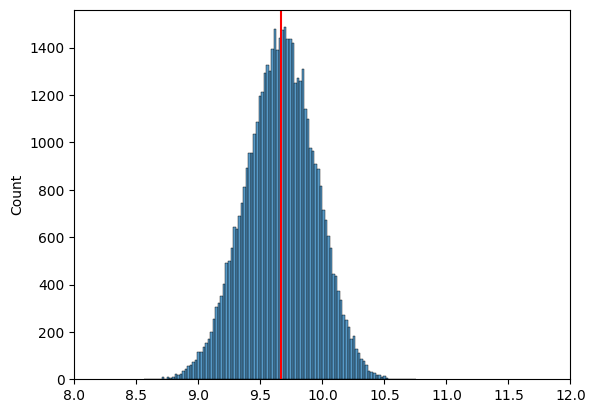

In [19]:
bootstrap_means = []
n_bootstraps = 50000

for i in range(n_bootstraps):
    # 1. draw a bootstrap sample
    bootstrap_sample = rng.choice(sample, size=10, replace=True)
    bootstrap_sample
    # 2. compute our mean again, with the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)

    # 3. add our bootstrap_mean to the list
    bootstrap_means.append(bootstrap_mean)

plt.axvline(goose_mean, color="red")

# as our n_bootstraps increase, we're able to see the spread of the estimate
sns.histplot(bootstrap_means)
# fix the xaxis
plt.xlim(8, 12);